In [102]:
# Load important module

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string



In [103]:
#Loading Datasets

reviews_file = r"C:\Users\BENSON KAMAU\OneDrive\Dokumente\Projo\New folder\British Airline Reviews Analysis\ba_reviews.csv"

countries_file = r"C:\Users\BENSON KAMAU\OneDrive\Dokumente\Projo\New folder\British Airline Reviews Analysis\Countries.csv"

ba_reviews = pd.read_csv(reviews_file)

countries = pd.read_csv(countries_file)







In [104]:
#Overview of Data

print("BA Reviews Datasets:")
print(ba_reviews.info())
print("\nHead of Dataset:")
print(ba_reviews.head())



BA Reviews Datasets:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   header               1324 non-null   object
 1   author               1324 non-null   object
 2   date                 1324 non-null   object
 3   place                1324 non-null   object
 4   content              1324 non-null   object
 5   aircraft             1324 non-null   object
 6   traveller_type       1323 non-null   object
 7   seat_type            1324 non-null   object
 8   route                1324 non-null   object
 9   date_flown           1324 non-null   object
 10  recommended          1324 non-null   object
 11  trip_verified        1324 non-null   object
 12  rating               1324 non-null   int64 
 13  seat_comfort         1324 non-null   int64 
 14  cabin_staff_service  1324 non-null   int64 
 15  food_beverages       1324 non-null

The dataset contains 1,324 reviews with the following key columns:

- **header, content**: The title and detailed content of the review.
- **author, place, date**: Reviewer’s details and when the review was posted.
- **aircraft, traveller_type, seat_type, route, date_flown**: Flight details including aircraft type, type of traveler, class of seat, route, and date flown.
- **recommended, trip_verified**: Whether the reviewer recommended the airline and if the trip is verified.
- **rating**: Overall rating of the experience.
- **seat_comfort, cabin_staff_service, food_beverages, ground_service, value_for_money, entertainment**: Sub-ratings for specific aspects of the experience.

In [105]:
print("Countries Dataset")
print(countries.info())
print("\nHead of Dataset:")
print(countries.head())


Countries Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    251 non-null    object
 1   Code       250 non-null    object
 2   Continent  251 non-null    object
 3   Region     251 non-null    object
dtypes: object(4)
memory usage: 8.0+ KB
None

Head of Dataset:
          Country Code Continent           Region
0     Afghanistan  AFG      Asia    Southern Asia
1   Åland Islands  ALA    Europe  Northern Europe
2         Albania  ALB    Europe  Southern Europe
3         Algeria  DZA    Africa  Northern Africa
4  American Samoa  ASM   Oceania        Polynesia


### Countries Dataset Overview

The **Countries** dataset provides information related to various countries. This dataset can be used to enrich or contextualize the **ba_reviews** dataset, such as analyzing trends or reviews based on the reviewers' country of origin.


#### Potential Uses:
- Combine with the **ba_reviews** dataset to analyze regional trends in airline reviews.
- Group reviews by countries to evaluate satisfaction levels and preferences by region.
- Explore correlations between country-specific factors (e.g., GDP, population) and review trends.




In [106]:
# Step 1: Check for missing values in both datasets
missing_values_ba = ba_reviews.isnull().sum()
print(missing_values_ba)

missing_values_countries = countries.isnull().sum()
print(missing_values_countries)

header                 0
author                 0
date                   0
place                  0
content                0
aircraft               0
traveller_type         1
seat_type              0
route                  0
date_flown             0
recommended            0
trip_verified          0
rating                 0
seat_comfort           0
cabin_staff_service    0
food_beverages         0
ground_service         0
value_for_money        0
entertainment          0
dtype: int64
Country      0
Code         1
Continent    0
Region       0
dtype: int64


In [107]:
# Identify the row with the missing Code
missing_code_row = countries[countries['Code'].isnull()]

missing_code_row

,Country,Code,Continent,Region
196,Sark,NaN,Europe,Northern Europe


In [108]:
countries.loc[countries["Country"] == 'Sark', 'Code'] = 'SRK'

In [109]:
# Identify rows with missing values in 'traveller_type'
missing_traveller_type = ba_reviews[ba_reviews['traveller_type'].isnull()]

# Display the row(s) with missing 'traveller_type'
print(missing_traveller_type)


                                      header      author        date  \
14  British Airways absolutely does not care  May Porter  01/09/2023   

             place                                            content  \
14  United Kingdom    British Airways absolutely does not care. My...   

      aircraft traveller_type      seat_type                  route  \
14  Boeing 777            NaN  Economy Class  Los Angeles to London   

    date_flown recommended trip_verified  rating  seat_comfort  \
14  01/08/2023          no      Verified       1             1   

    cabin_staff_service  food_beverages  ground_service  value_for_money  \
14                    1               1               1                1   

    entertainment  
14              1  


In [110]:
# Get the index of rows with missing values
missing_indices = ba_reviews[ba_reviews['traveller_type'].isnull()].index
print("Indices with missing traveller_type:", missing_indices)


Indices with missing traveller_type: Int64Index([14], dtype='int64')


In [111]:
most_frequent_type = ba_reviews['traveller_type'].mode()[0]
ba_reviews['traveller_type'].fillna(most_frequent_type, inplace=True)


In [112]:
print(ba_reviews['traveller_type'].isnull().sum())  # Should print 0


0


In [113]:
# Check for duplicate rows
duplicates = ba_reviews.duplicated().sum()
print(f"Number of duplicate rows in BA Reviews: {duplicates}")


Number of duplicate rows in BA Reviews: 0


In [114]:
# Step 4: Descriptive Statistics
print("\nDescriptive Statistics:")
print(ba_reviews.describe(include='all'))


Descriptive Statistics:
                       header     author        date           place  \
count                    1324       1324        1324            1324   
unique                   1300        833         938              56   
top     Overall a good flight  1 reviews  14/09/2016  United Kingdom   
freq                        5         54           6             849   
mean                      NaN        NaN         NaN             NaN   
std                       NaN        NaN         NaN             NaN   
min                       NaN        NaN         NaN             NaN   
25%                       NaN        NaN         NaN             NaN   
50%                       NaN        NaN         NaN             NaN   
75%                       NaN        NaN         NaN             NaN   
max                       NaN        NaN         NaN             NaN   

                                                  content aircraft  \
count                                   

### Key Takeaways
- **Most Common Place**: United Kingdom (849 reviews).
- **Most Common Aircraft**: A320 (263 reviews).
- **Average Rating**: 4.19 (out of 10).

#### Service Ratings:
- **Cabin Staff**: Average 3.28
- **Seat Comfort**: Average 2.87
- **Value for Money**: Average 2.78
- **Entertainment**: Average 1.44 (lowest-rated category).


In [115]:
# Preprocessing for ba_reviews dataset
ba_reviews['date'] = pd.to_datetime(ba_reviews['date'], errors='coerce', dayfirst=True)

ba_reviews['date_flown'] = pd.to_datetime(ba_reviews['date_flown'], errors='coerce',dayfirst=True )

ba_reviews['place_cleaned'] = ba_reviews['place'].str.strip().str.title()



In [116]:
# Merge datasets on country/place
countries['Country'] = countries['Country'].str.strip()
merged_data = pd.merge(
    ba_reviews,
    countries,
    left_on='place_cleaned',
    right_on='Country',
    how='left'
)

In [117]:
merged_data.head()

,header,author,date,place,content,aircraft,traveller_type,seat_type,route,date_flown,...,cabin_staff_service,food_beverages,ground_service,value_for_money,entertainment,place_cleaned,Country,Code,Continent,Region
0,service was mediocre at best,Gary Storer,2023-10-03,United Kingdom,"Just returned from Chicago, flew out 10 days ...",A380,Couple Leisure,Economy Class,Chicago to Manchester via Heathrow,2023-10-01,...,3,1,2,2,-1,United Kingdom,United Kingdom,GBR,Europe,Northern Europe
1,BA standards continue to decline,A Jensen,2023-10-02,United Kingdom,BA standards continue to decline every time ...,A320,Business,Business Class,London Heathrow to Munich,2023-09-01,...,1,2,1,1,-1,United Kingdom,United Kingdom,GBR,Europe,Northern Europe
2,"won the race to the bottom""",John Rockett,2023-10-02,United Kingdom,Awful. Business class check in queue just as...,A320,Couple Leisure,Business Class,Heathrow to Istanbul,2023-09-01,...,3,2,1,1,-1,United Kingdom,United Kingdom,GBR,Europe,Northern Europe
3,Not a reliable airline,Tatiana Bobrovskaya,2023-10-02,United Kingdom,Not a reliable airline. You cannot trust the...,A320,Business,Economy Class,London to Geneva,2023-10-01,...,4,2,1,1,-1,United Kingdom,United Kingdom,GBR,Europe,Northern Europe
4,Very disappointed,Tom Slowbe,2023-09-28,United States,"The airplanes and the lounges are worn out, o...",777-300 and A320,Couple Leisure,First Class,Dallas to Dubrovnik via Heathrow,2023-09-01,...,4,4,3,2,3,United States,United States,USA,North America,Northern America


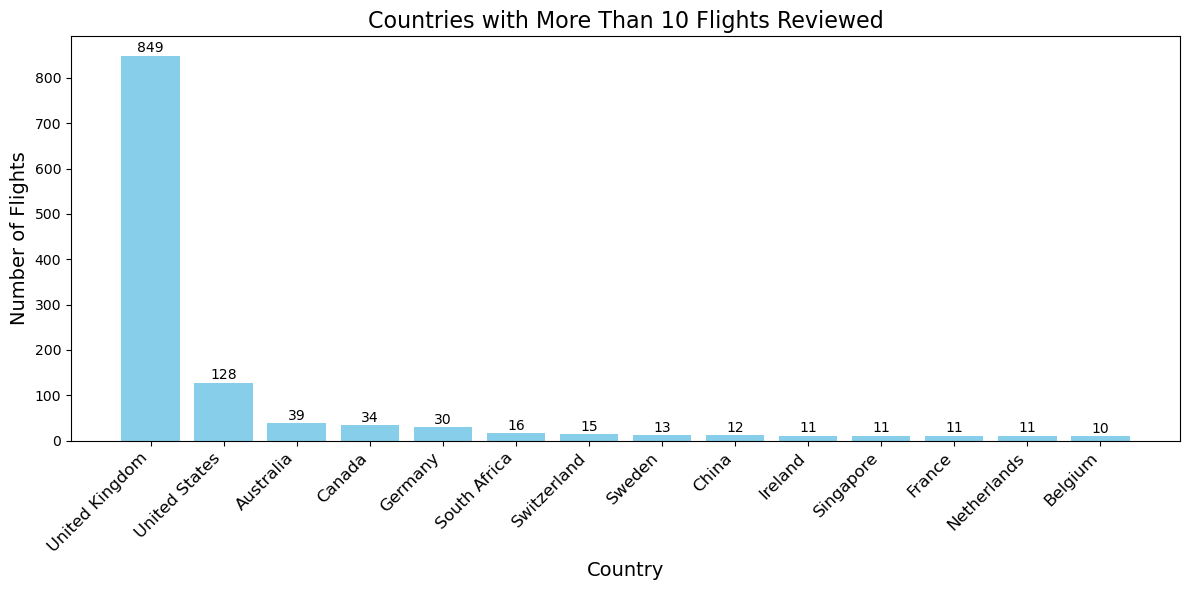

In [129]:
import matplotlib.pyplot as plt

# Count the number of reviews per country
flights_per_country = merged_data['place_cleaned'].value_counts().reset_index()

# Rename the columns for clarity
flights_per_country.columns = ['Country', 'Number of Flights']


# Filter countries with more than 10 flights
countries_more_than_10_flights = flights_per_country[flights_per_country['Number of Flights'] >= 10]

# Sort for better visualization
countries_more_than_10_flights_sorted = countries_more_than_10_flights.sort_values(by='Number of Flights', ascending=False)

# Plot countries with more than 10 flights, including numbers on top of bars
plt.figure(figsize=(12, 6))
bars = plt.bar(
    countries_more_than_10_flights_sorted['Country'], 
    countries_more_than_10_flights_sorted['Number of Flights'], 
    color='skyblue'
)

# Add text on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-coordinate
        height + 0.5,                      # y-coordinate (just above the bar)
        f'{int(height)}',                  # Label (number of flights)
        ha='center',                       # Center alignment
        va='bottom',                       # Text position
        fontsize=10                        # Font size
    )

# Add titles and labels
plt.title('Countries with More Than 10 Flights Reviewed', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


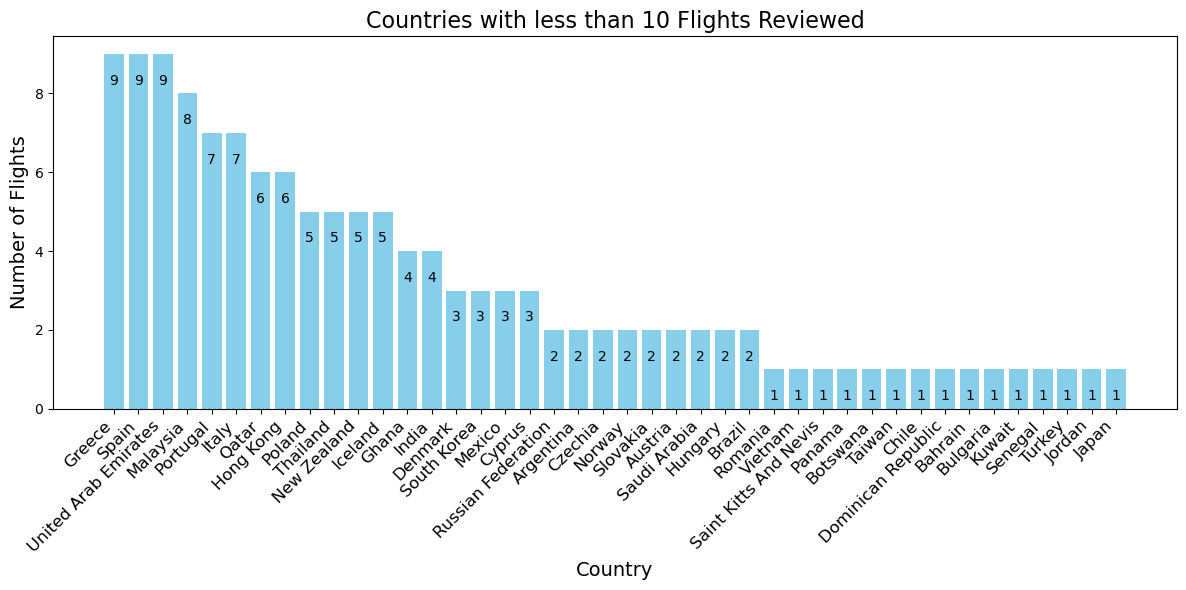

In [135]:
# Filter countries with 9 or more flights
countries_more_than_9_flights = flights_per_country[flights_per_country['Number of Flights'] < 10]

# Sort for better visualization
countries_more_than_9_flights_sorted = countries_more_than_9_flights.sort_values(by='Number of Flights', ascending=False)

# Plot countries with 9 or more flights, including numbers inside the bars for small values
plt.figure(figsize=(12, 6))
bars = plt.bar(
    countries_more_than_9_flights_sorted['Country'], 
    countries_more_than_9_flights_sorted['Number of Flights'], 
    color='skyblue'
)

# Add text inside or above bars based on the bar height
for bar in bars:
    height = bar.get_height()
    if height <= 9:  # For small values like 9, place text inside the bar
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # x-coordinate
            height - 0.5,                      # y-coordinate (just inside the bar)
            f'{int(height)}',                  # Label (number of flights)
            ha='center',                       # Center alignment
            va='top',                          # Text position
            fontsize=10,                       # Font size
            color='black'                      # Text color to contrast with the bar
        )
    else:  # For larger values, place text above the bar
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # x-coordinate
            height + 0.5,                      # y-coordinate (just above the bar)
            f'{int(height)}',                  # Label (number of flights)
            ha='center',                       # Center alignment
            va='bottom',                       # Text position
            fontsize=10                        # Font size
        )

# Add titles and labels
plt.title('Countries with less than 10 Flights Reviewed', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


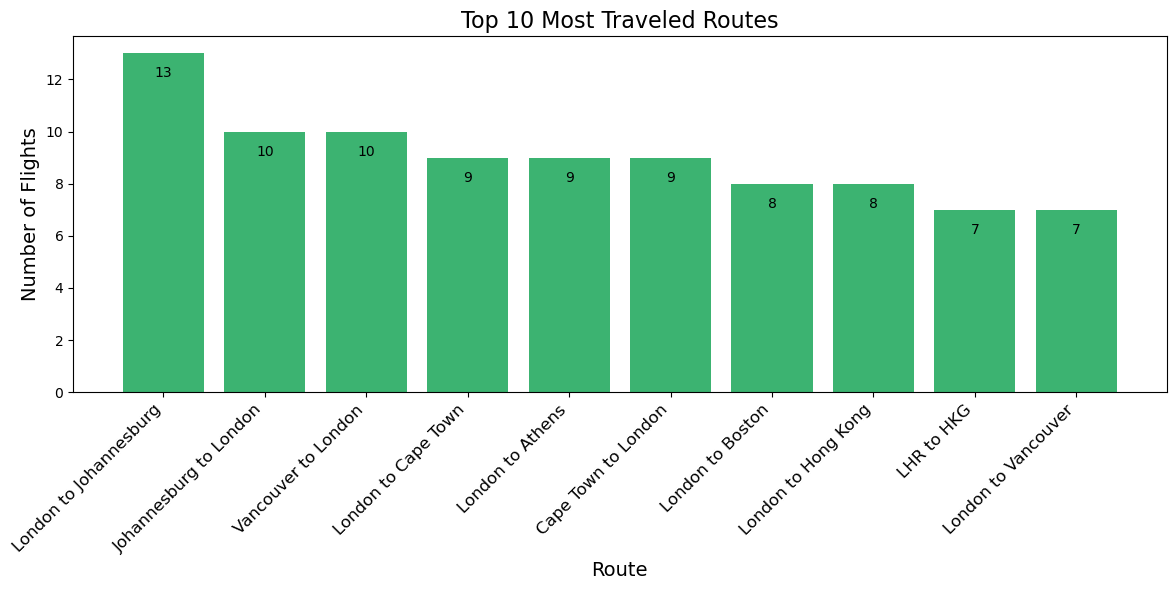

In [138]:
# Count the number of reviews per route
routes_count = merged_data['route'].value_counts().reset_index()
routes_count.columns = ['Route', 'Number of Flights']

# Sort for visualization: Top 10 most traveled routes
top_routes = routes_count.head(10)

# Plot the most traveled routes
plt.figure(figsize=(12, 6))
bars = plt.bar(
    top_routes['Route'], 
    top_routes['Number of Flights'], 
    color='mediumseagreen'
)

# Add numbers inside each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-coordinate
        height - 0.5,                      # y-coordinate (slightly below the bar height)
        f'{int(height)}',                  # Label (number of flights)
        ha='center',                       # Center alignment
        va='top',                          # Text position inside the bar
        fontsize=10,                       # Font size
        color='black'                      # Text color
    )

# Add titles and labels
plt.title('Top 10 Most Traveled Routes', fontsize=16)
plt.xlabel('Route', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


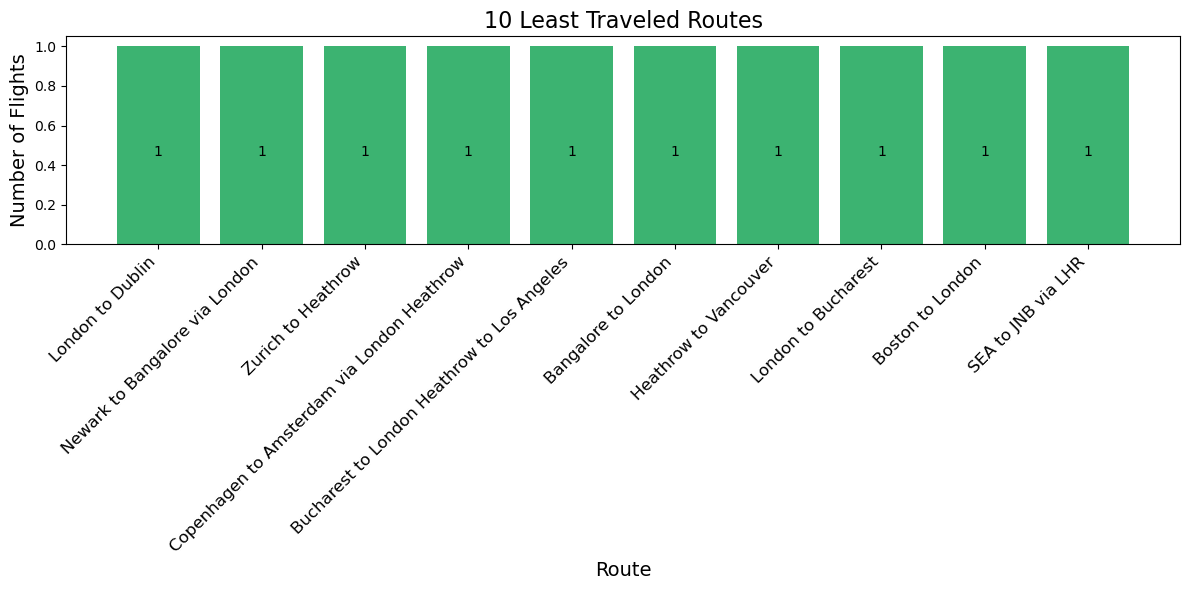

In [139]:
# Count the number of reviews per route
routes_count = merged_data['route'].value_counts().reset_index()
routes_count.columns = ['Route', 'Number of Flights']

# Sort for visualization: 10 least traveled routes
top_routes = routes_count.tail(10)

# Plot the most traveled routes
plt.figure(figsize=(12, 6))
bars = plt.bar(
    top_routes['Route'], 
    top_routes['Number of Flights'], 
    color='mediumseagreen'
)

# Add numbers inside each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-coordinate
        height - 0.5,                      # y-coordinate (slightly below the bar height)
        f'{int(height)}',                  # Label (number of flights)
        ha='center',                       # Center alignment
        va='top',                          # Text position inside the bar
        fontsize=10,                       # Font size
        color='black'                      # Text color
    )

# Add titles and labels
plt.title('10 Least Traveled Routes', fontsize=16)
plt.xlabel('Route', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


In [140]:
# Find unique aircraft and their corresponding number of flights
unique_aircraft = merged_data['aircraft'].value_counts().reset_index()
unique_aircraft.columns = ['Aircraft', 'Number of Flights']

unique_aircraft



,Aircraft,Number of Flights
0,A320,263
1,Boeing 777,177
2,A380,124
3,Boeing 747-400,97
4,Boeing 777-200,80
...,...,...
145,A319/A320,1
146,B747-400 in retro,1
147,Boeing 777 / 747,1
148,A321 / Boeing 787-9,1


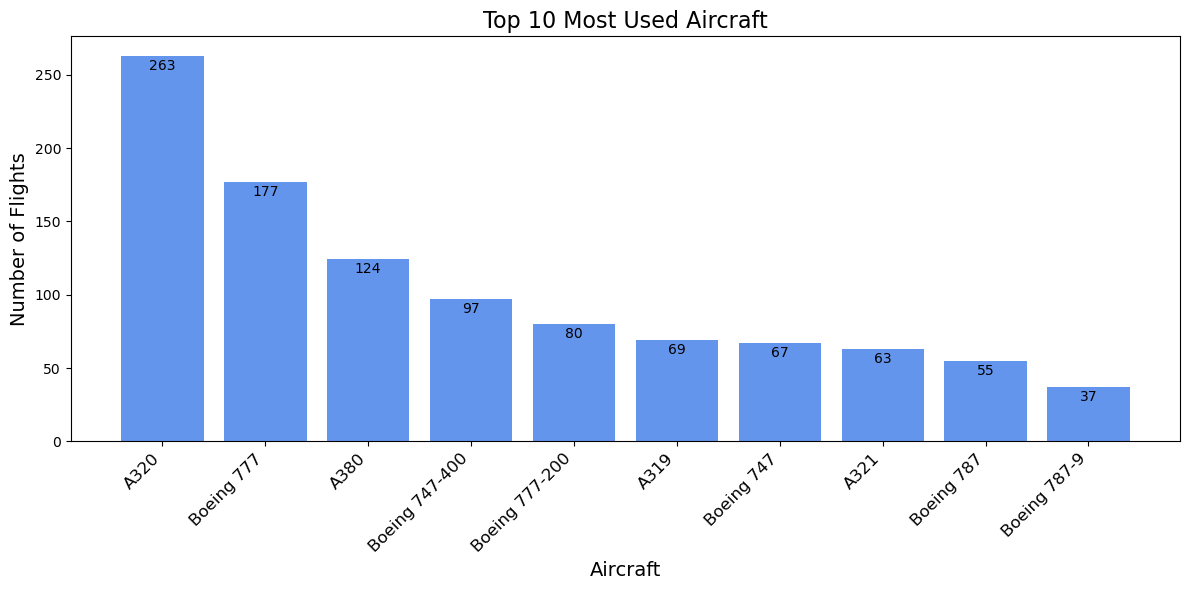

In [142]:
# Count the number of reviews per aircraft
aircraft_count = merged_data['aircraft'].value_counts().reset_index()
aircraft_count.columns = ['Aircraft', 'Number of Flights']

# Sort for visualization: Top 10 most used aircraft
top_aircraft = aircraft_count.head(10)

# Plot the most used aircraft
plt.figure(figsize=(12, 6))
bars = plt.bar(
    top_aircraft['Aircraft'], 
    top_aircraft['Number of Flights'], 
    color='cornflowerblue'
)

# Add numbers inside each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-coordinate
        height - 2,                        # y-coordinate (slightly below the top of the bar)
        f'{int(height)}',                  # Label (number of flights)
        ha='center',                       # Center alignment
        va='top',                          # Text position inside the bar
        fontsize=10,                       # Font size
        color='black'                      # Text color
    )

# Add titles and labels
plt.title('Top 10 Most Used Aircraft', fontsize=16)
plt.xlabel('Aircraft', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


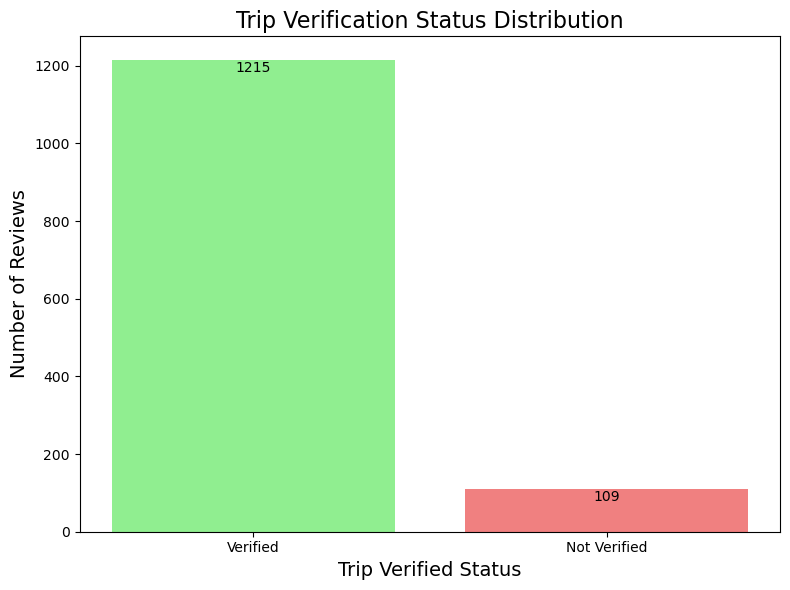

In [143]:
# Count the number of reviews by trip verification status
verification_count = merged_data['trip_verified'].value_counts().reset_index()
verification_count.columns = ['Trip Verified Status', 'Number of Reviews']

# Calculate average ratings for each verification status
verification_avg_rating = merged_data.groupby('trip_verified')['rating'].mean().reset_index()
verification_avg_rating.columns = ['Trip Verified Status', 'Average Rating']

# Merge counts and average ratings for comprehensive analysis
verification_analysis = pd.merge(
    verification_count,
    verification_avg_rating,
    on='Trip Verified Status'
)


# Visualize the distribution of trip verification status
plt.figure(figsize=(8, 6))
bars = plt.bar(
    verification_count['Trip Verified Status'], 
    verification_count['Number of Reviews'], 
    color=['lightgreen', 'lightcoral']
)

# Add counts on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-coordinate
        height - 2,                        # y-coordinate (slightly below the top of the bar)
        f'{int(height)}',                  # Label (number of flights)
        ha='center',                       # Center alignment
        va='top',                          # Text position inside the bar
        fontsize=10,                       # Font size
        color='black'                      # Text color
    )

# Add titles and labels
plt.title('Trip Verification Status Distribution', fontsize=16)
plt.xlabel('Trip Verified Status', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.tight_layout()
plt.show()


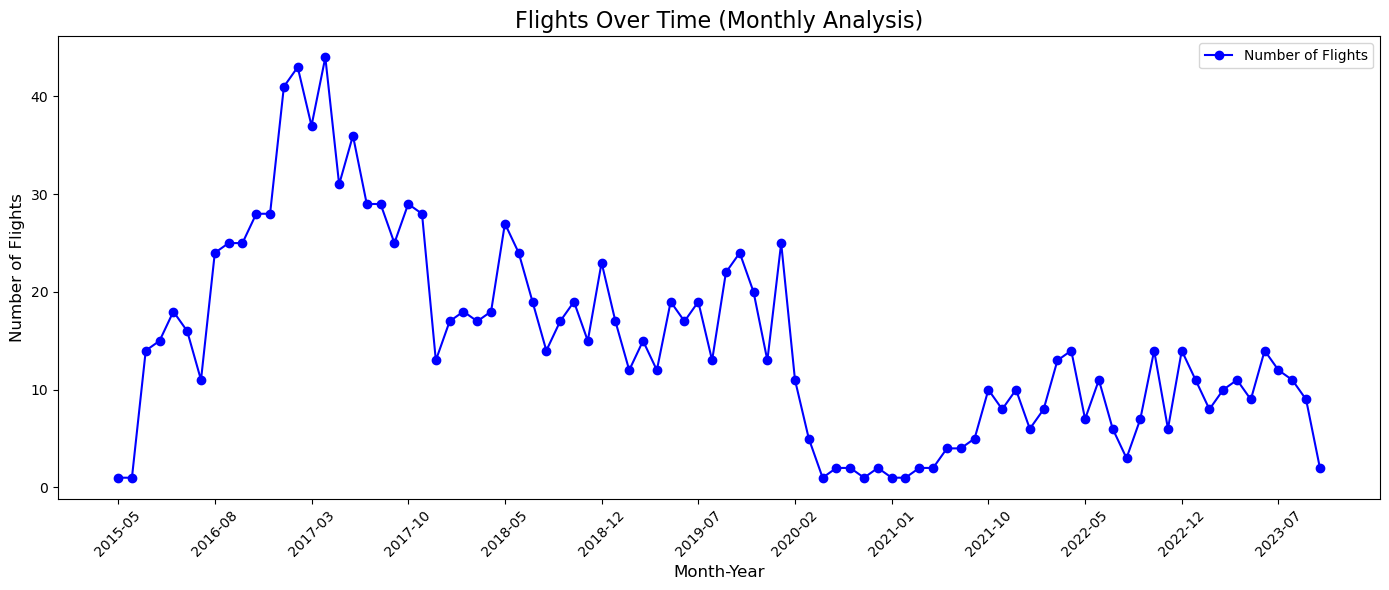

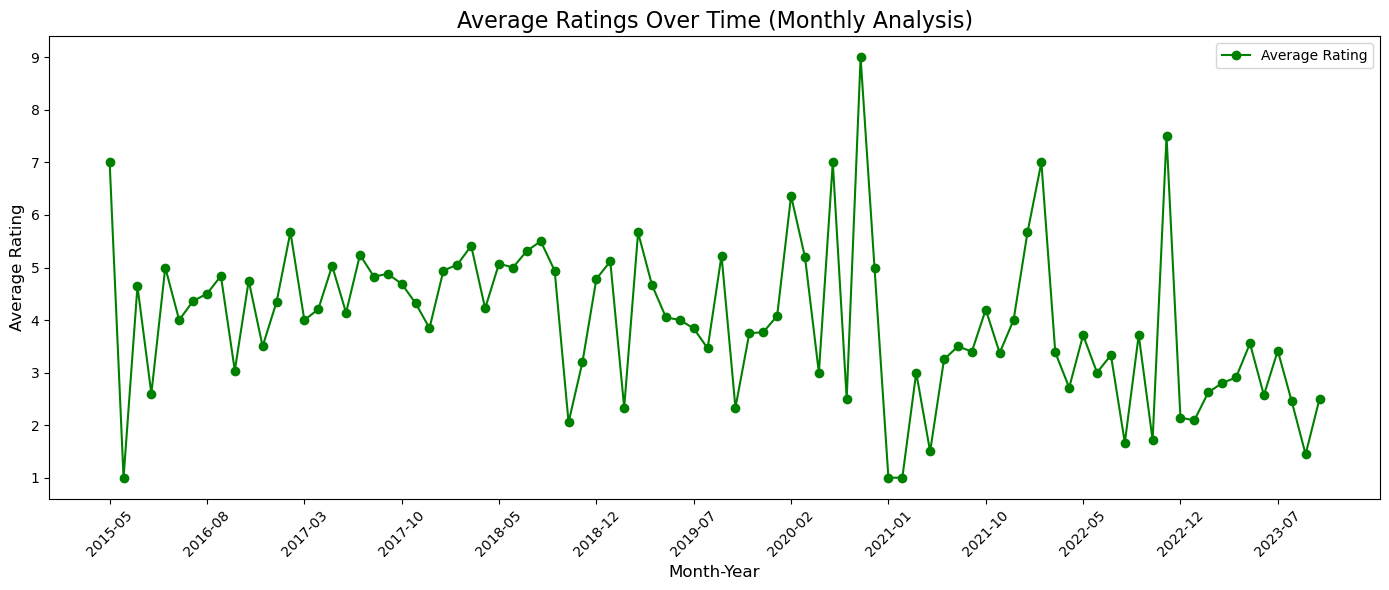

In [144]:
# Extract year and month from the 'date_flown' column
merged_data['Year'] = merged_data['date_flown'].dt.year
merged_data['Month'] = merged_data['date_flown'].dt.month

# Aggregate data by year and month
monthly_analysis = merged_data.groupby(['Year', 'Month']).agg(
    Number_of_Flights=('route', 'count'),
    Average_Rating=('rating', 'mean')
).reset_index()

# Add a 'Month-Year' column for easier plotting
monthly_analysis['Month-Year'] = monthly_analysis['Year'].astype(str) + '-' + monthly_analysis['Month'].astype(str).str.zfill(2)

# Sort data for visualization
monthly_analysis = monthly_analysis.sort_values(by=['Year', 'Month'])

# Adjust x-axis for better readability by reducing the number of ticks
plt.figure(figsize=(14, 6))
plt.plot(monthly_analysis['Month-Year'], monthly_analysis['Number_of_Flights'], marker='o', label='Number of Flights', color='blue')

# Reduce the number of ticks on the x-axis
step = max(1, len(monthly_analysis) // 12)  # Show roughly 12 labels
plt.xticks(ticks=range(0, len(monthly_analysis), step), labels=monthly_analysis['Month-Year'][::step], rotation=45, fontsize=10)

plt.title('Flights Over Time (Monthly Analysis)', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.tight_layout()
plt.legend()
plt.show()

# Adjust x-axis for average ratings plot
plt.figure(figsize=(14, 6))
plt.plot(monthly_analysis['Month-Year'], monthly_analysis['Average_Rating'], marker='o', label='Average Rating', color='green')

# Reduce the number of ticks on the x-axis
plt.xticks(ticks=range(0, len(monthly_analysis), step), labels=monthly_analysis['Month-Year'][::step], rotation=45, fontsize=10)

plt.title('Average Ratings Over Time (Monthly Analysis)', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.tight_layout()
plt.legend()
plt.show()


In [145]:
# Filter data for countries with more than 10 flights reviewed
countries_with_more_than_10 = flights_per_country[flights_per_country['Number of Flights'] > 10]['Country']
filtered_data = merged_data[merged_data['place_cleaned'].isin(countries_with_more_than_10)]

# Group by country and calculate average metrics
influence_analysis = filtered_data.groupby('place_cleaned').agg(
    avg_rating=('rating', 'mean'),
    avg_seat_comfort=('seat_comfort', 'mean'),
    avg_cabin_staff_service=('cabin_staff_service', 'mean'),
    avg_food_beverages=('food_beverages', 'mean'),
    avg_ground_service=('ground_service', 'mean'),
    avg_value_for_money=('value_for_money', 'mean'),
    avg_entertainment=('entertainment', 'mean')
).reset_index()

# Display the influence analysis

influence_analysis



,place_cleaned,avg_rating,avg_seat_comfort,avg_cabin_staff_service,avg_food_beverages,avg_ground_service,avg_value_for_money,avg_entertainment
0,Australia,4.179487,2.512821,2.589744,1.820513,2.974359,2.564103,1.282051
1,Canada,4.294118,2.823529,3.500000,2.676471,3.323529,2.911765,2.529412
2,China,3.750000,3.833333,4.333333,3.750000,3.750000,4.500000,1.833333
3,France,4.454545,2.181818,2.363636,1.818182,2.727273,2.363636,0.454545
4,Germany,3.100000,2.266667,2.866667,1.566667,2.566667,2.200000,1.066667
5,Ireland,4.545455,2.818182,2.818182,2.636364,2.636364,2.818182,1.818182
6,Netherlands,5.181818,3.636364,3.818182,3.090909,3.181818,3.454545,1.454545
7,Singapore,5.272727,3.181818,3.181818,2.818182,3.090909,3.454545,2.181818
8,South Africa,3.187500,2.812500,2.875000,2.812500,3.437500,3.062500,2.375000
9,Sweden,3.307692,2.923077,4.000000,2.307692,2.384615,2.923077,0.615385


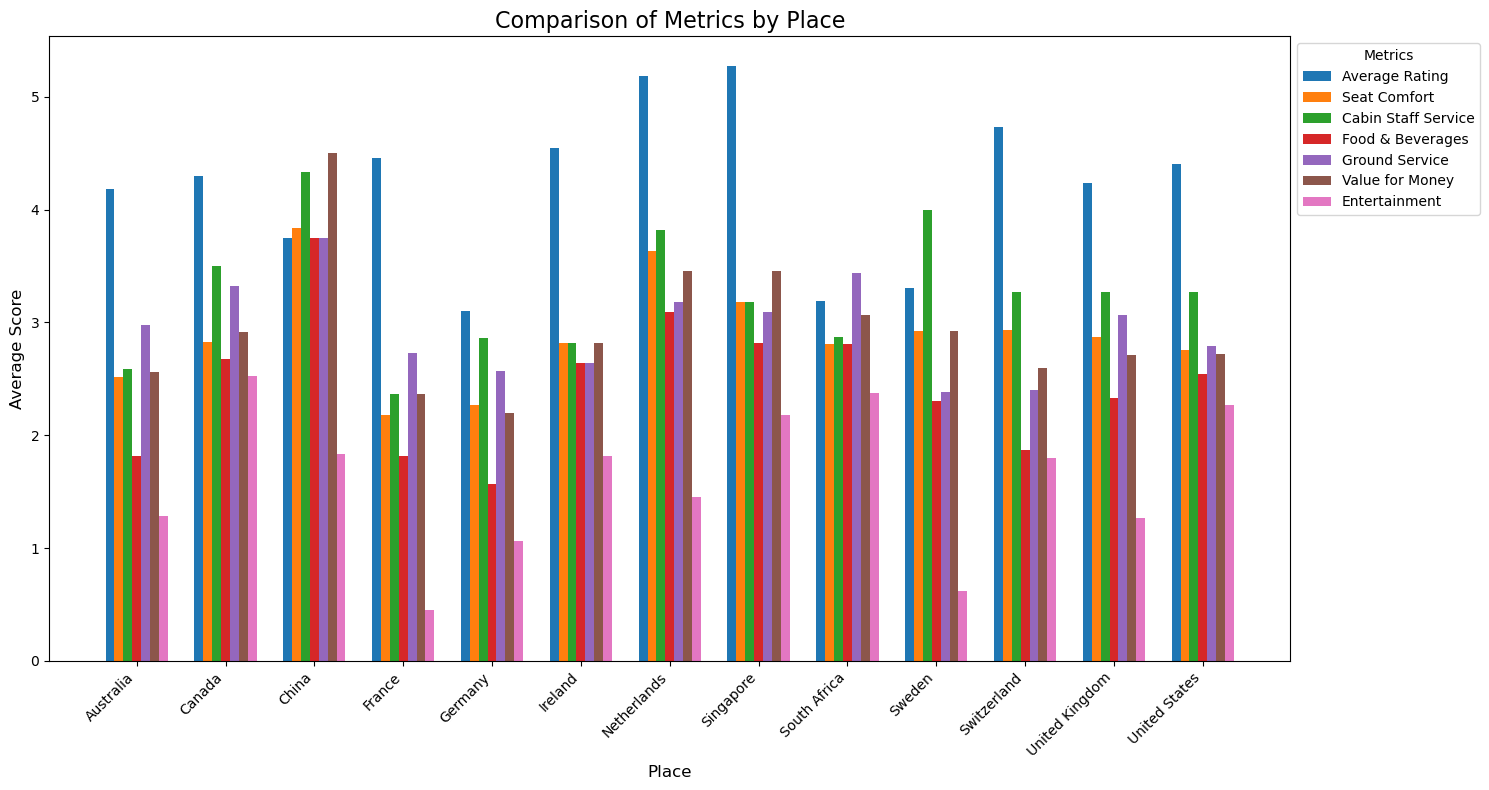

In [148]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics and titles for labels
metrics = [
    'avg_rating', 'avg_seat_comfort', 'avg_cabin_staff_service',
    'avg_food_beverages', 'avg_ground_service', 'avg_value_for_money', 'avg_entertainment'
]
titles = [
    'Average Rating', 'Seat Comfort', 'Cabin Staff Service',
    'Food & Beverages', 'Ground Service', 'Value for Money', 'Entertainment'
]

# Prepare data for grouped bar chart
places = influence_analysis['place_cleaned']
x = np.arange(len(places))  # X-axis positions
width = 0.1  # Width of each bar

# Set up the figure
plt.figure(figsize=(15, 8))

# Plot each metric as a grouped bar
for i, metric in enumerate(metrics):
    plt.bar(x + i * width, influence_analysis[metric], width, label=titles[i])

# Add labels, title, and legend
plt.xticks(x + width * (len(metrics) - 1) / 2, places, rotation=45, ha='right', fontsize=10)
plt.title('Comparison of Metrics by Place', fontsize=16)
plt.xlabel('Place', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.legend(title='Metrics', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()


In [149]:
# Filter data for the top 10 most used aircraft
top_10_aircraft = aircraft_count.head(10)['Aircraft']
filtered_aircraft_data = merged_data[merged_data['aircraft'].isin(top_10_aircraft)]

# Group by aircraft and calculate average metrics
aircraft_influence_analysis = filtered_aircraft_data.groupby('aircraft').agg(
    avg_rating=('rating', 'mean'),
    avg_seat_comfort=('seat_comfort', 'mean'),
    avg_cabin_staff_service=('cabin_staff_service', 'mean'),
    avg_food_beverages=('food_beverages', 'mean'),
    avg_ground_service=('ground_service', 'mean'),
    avg_value_for_money=('value_for_money', 'mean'),
    avg_entertainment=('entertainment', 'mean')
).reset_index()

# Display the analysis

aircraft_influence_analysis


,aircraft,avg_rating,avg_seat_comfort,avg_cabin_staff_service,avg_food_beverages,avg_ground_service,avg_value_for_money,avg_entertainment
0,A319,3.840580,2.608696,3.246377,1.695652,2.855072,2.695652,-0.739130
1,A320,4.262357,2.650190,3.076046,1.794677,2.813688,2.604563,-0.505703
2,A321,3.587302,2.682540,3.333333,1.634921,2.761905,2.666667,-0.396825
3,A380,3.983871,3.250000,3.411290,2.838710,3.217742,3.016129,2.943548
4,Boeing 747,4.432836,2.477612,3.179104,2.343284,2.686567,2.283582,1.835821
5,Boeing 747-400,4.690722,2.804124,3.237113,2.670103,3.082474,2.670103,2.587629
6,Boeing 777,4.395480,2.819209,3.000000,2.440678,2.836158,2.531073,2.192090
7,Boeing 777-200,3.812500,2.950000,3.525000,2.837500,3.475000,3.050000,2.575000
8,Boeing 787,4.400000,2.836364,3.363636,2.963636,3.145455,3.036364,3.145455
9,Boeing 787-9,3.972973,3.621622,3.432432,3.027027,3.675676,3.378378,3.378378


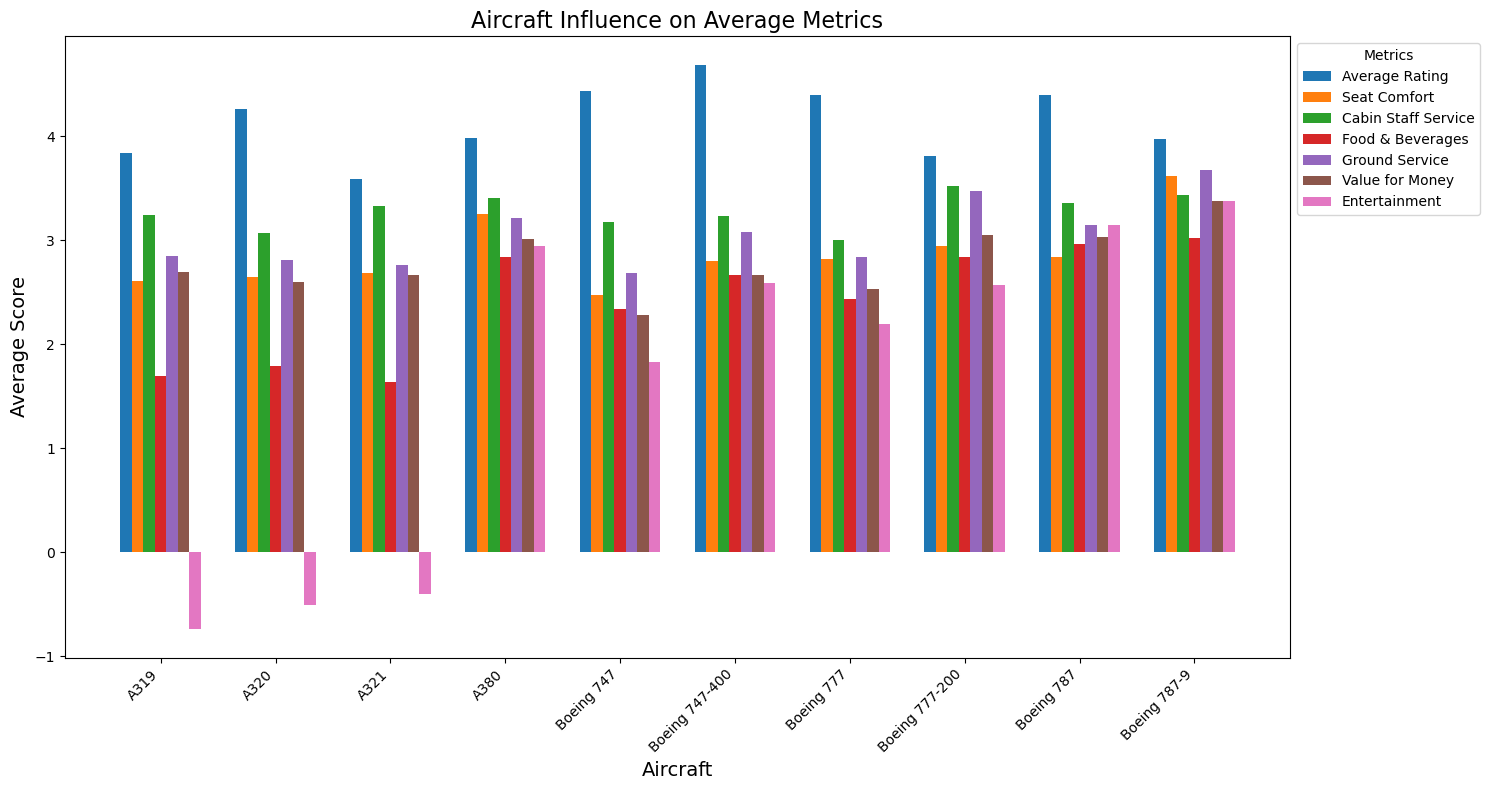

In [152]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics and titles
metrics = [
    'avg_rating', 'avg_seat_comfort', 'avg_cabin_staff_service',
    'avg_food_beverages', 'avg_ground_service', 'avg_value_for_money', 'avg_entertainment'
]
titles = [
    'Average Rating', 'Seat Comfort', 'Cabin Staff Service',
    'Food & Beverages', 'Ground Service', 'Value for Money', 'Entertainment'
]

# Prepare data for grouped bar chart
aircraft = aircraft_influence_analysis['aircraft']
x = np.arange(len(aircraft))  # X-axis positions
width = 0.1  # Width of each bar

# Set up the figure
plt.figure(figsize=(15, 8))

# Plot each metric as a grouped bar
for i, metric in enumerate(metrics):
    plt.bar(x + i * width, aircraft_influence_analysis[metric], width, label=titles[i])

# Add labels, title, and legend
plt.xticks(x + width * (len(metrics) - 1) / 2, aircraft, rotation=45, ha='right', fontsize=10)
plt.title('Aircraft Influence on Average Metrics', fontsize=16)
plt.xlabel('Aircraft', fontsize=14)
plt.ylabel('Average Score', fontsize=14)
plt.legend(title='Metrics', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Show the chart
plt.show()


In [153]:
# Group data by traveller type and calculate average metrics
traveller_type_influence = merged_data.groupby('traveller_type').agg(
    avg_rating=('rating', 'mean'),
    avg_seat_comfort=('seat_comfort', 'mean'),
    avg_cabin_staff_service=('cabin_staff_service', 'mean'),
    avg_food_beverages=('food_beverages', 'mean'),
    avg_ground_service=('ground_service', 'mean'),
    avg_value_for_money=('value_for_money', 'mean'),
    avg_entertainment=('entertainment', 'mean')
).reset_index()

# Display the analysis
traveller_type_influence


,traveller_type,avg_rating,avg_seat_comfort,avg_cabin_staff_service,avg_food_beverages,avg_ground_service,avg_value_for_money,avg_entertainment
0,Business,4.193038,2.449367,2.810127,1.854430,2.604430,2.208861,1.056962
1,Couple Leisure,4.243848,2.816555,3.324385,2.494407,3.076063,2.812081,1.402685
2,Family Leisure,3.803468,3.017341,3.549133,2.485549,3.086705,2.890173,1.815029
3,Solo Leisure,4.293814,3.208763,3.492268,2.634021,3.304124,3.152062,1.613402


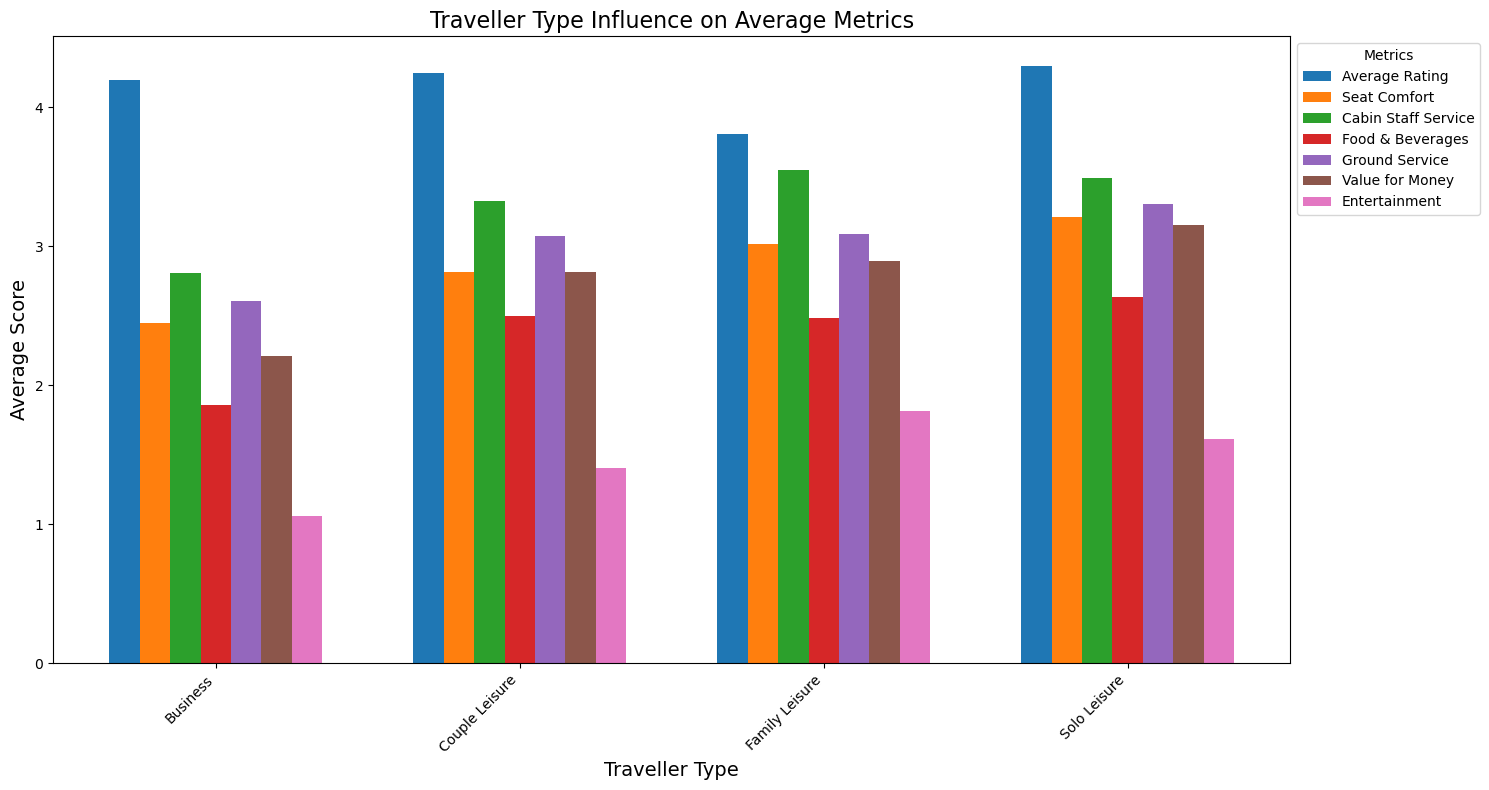

In [155]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics and titles
metrics = [
    'avg_rating', 'avg_seat_comfort', 'avg_cabin_staff_service',
    'avg_food_beverages', 'avg_ground_service', 'avg_value_for_money', 'avg_entertainment'
]
titles = [
    'Average Rating', 'Seat Comfort', 'Cabin Staff Service',
    'Food & Beverages', 'Ground Service', 'Value for Money', 'Entertainment'
]

# Prepare data for grouped bar chart
traveller_types = traveller_type_influence['traveller_type']
x = np.arange(len(traveller_types))  # X-axis positions
width = 0.1  # Width of each bar

# Set up the figure
plt.figure(figsize=(15, 8))

# Plot each metric as a grouped bar
for i, metric in enumerate(metrics):
    plt.bar(x + i * width, traveller_type_influence[metric], width, label=titles[i])

# Add labels, title, and legend
plt.xticks(x + width * (len(metrics) - 1) / 2, traveller_types, rotation=45, ha='right', fontsize=10)
plt.title('Traveller Type Influence on Average Metrics', fontsize=16)
plt.xlabel('Traveller Type', fontsize=14)
plt.ylabel('Average Score', fontsize=14)
plt.legend(title='Metrics', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Show the chart
plt.show()


In [156]:
# Group data by seat type and calculate average metrics
seat_type_influence = merged_data.groupby('seat_type').agg(
    avg_rating=('rating', 'mean'),
    avg_seat_comfort=('seat_comfort', 'mean'),
    avg_cabin_staff_service=('cabin_staff_service', 'mean'),
    avg_food_beverages=('food_beverages', 'mean'),
    avg_ground_service=('ground_service', 'mean'),
    avg_value_for_money=('value_for_money', 'mean'),
    avg_entertainment=('entertainment', 'mean')
).reset_index()

# Display the analysis

seat_type_influence

,seat_type,avg_rating,avg_seat_comfort,avg_cabin_staff_service,avg_food_beverages,avg_ground_service,avg_value_for_money,avg_entertainment
0,Business Class,3.934132,2.848303,3.407186,2.818363,3.001996,2.748503,1.305389
1,Economy Class,4.364238,2.740066,3.109272,1.892384,2.990066,2.773179,1.105960
2,First Class,4.390805,3.563218,3.862069,3.045977,3.229885,2.965517,2.747126
3,Premium Economy,4.219697,3.090909,3.196970,2.522727,3.204545,2.787879,2.575758


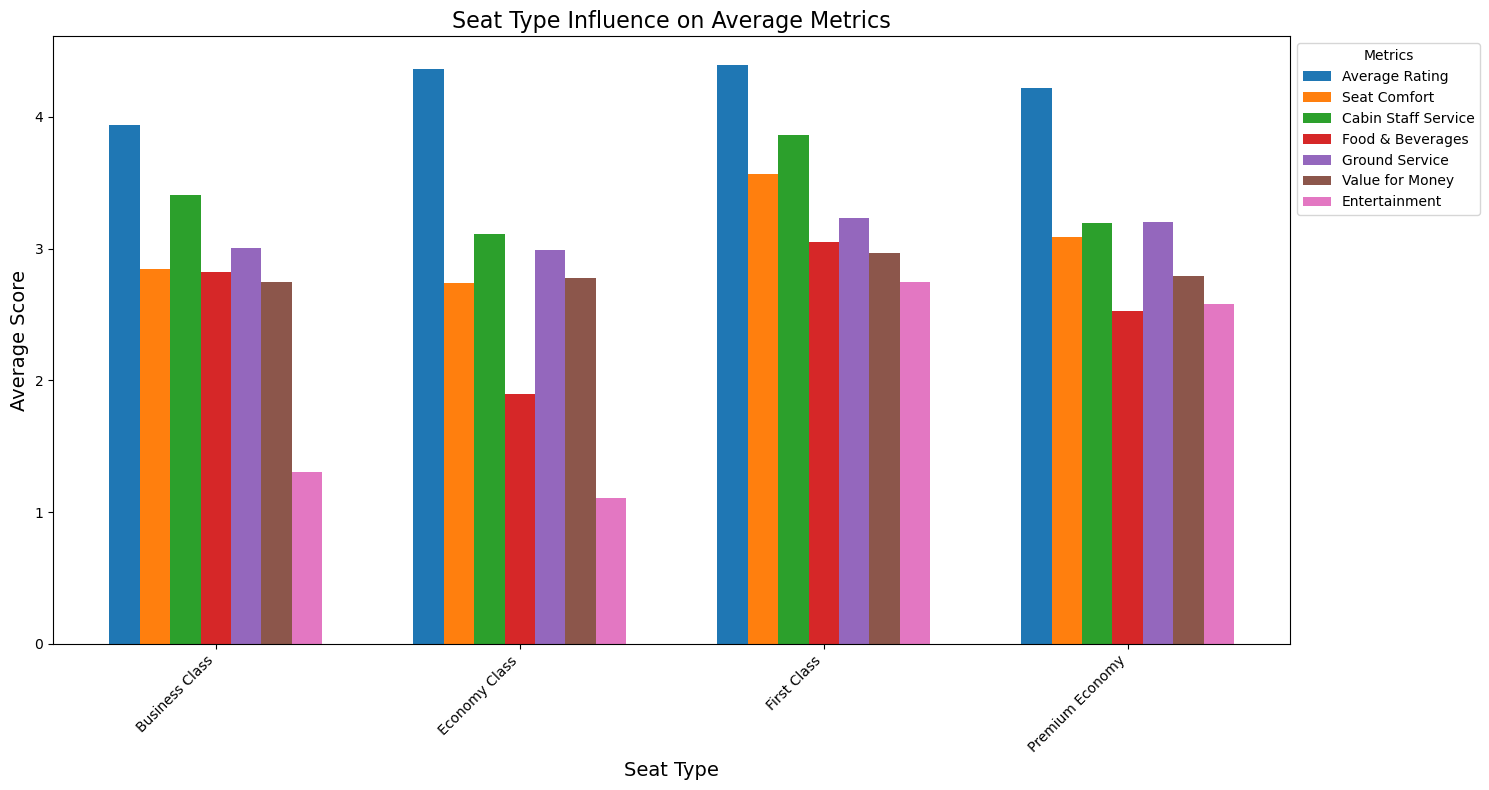

In [159]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics and their labels
metrics = [
    'avg_rating', 'avg_seat_comfort', 'avg_cabin_staff_service',
    'avg_food_beverages', 'avg_ground_service', 'avg_value_for_money', 'avg_entertainment'
]
titles = [
    'Average Rating', 'Seat Comfort', 'Cabin Staff Service',
    'Food & Beverages', 'Ground Service', 'Value for Money', 'Entertainment'
]

# Prepare data for grouped bar chart
seat_types = seat_type_influence['seat_type']
x = np.arange(len(seat_types))  # X-axis positions for seat types
width = 0.1  # Width of each bar

# Set up the figure
plt.figure(figsize=(15, 8))

# Plot each metric as a grouped bar
for i, metric in enumerate(metrics):
    plt.bar(x + i * width, seat_type_influence[metric], width, label=titles[i])

# Add labels, title, and legend
plt.xticks(x + width * (len(metrics) - 1) / 2, seat_types, rotation=45, ha='right', fontsize=10)
plt.title('Seat Type Influence on Average Metrics', fontsize=16)
plt.xlabel('Seat Type', fontsize=14)
plt.ylabel('Average Score', fontsize=14)
plt.legend(title='Metrics', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Show the chart
plt.show()


In [160]:
# Group data by recommendation status and calculate average metrics
recommendation_influence = merged_data.groupby('recommended').agg(
    avg_rating=('rating', 'mean'),
    avg_seat_comfort=('seat_comfort', 'mean'),
    avg_cabin_staff_service=('cabin_staff_service', 'mean'),
    avg_food_beverages=('food_beverages', 'mean'),
    avg_ground_service=('ground_service', 'mean'),
    avg_value_for_money=('value_for_money', 'mean'),
    avg_entertainment=('entertainment', 'mean')
).reset_index()

# Display the analysis

recommendation_influence


,recommended,avg_rating,avg_seat_comfort,avg_cabin_staff_service,avg_food_beverages,avg_ground_service,avg_value_for_money,avg_entertainment
0,no,4.222074,2.097074,2.437500,1.497340,2.324468,1.824468,1.014628
1,yes,4.145105,3.886364,4.388112,3.543706,3.961538,4.031469,1.989510


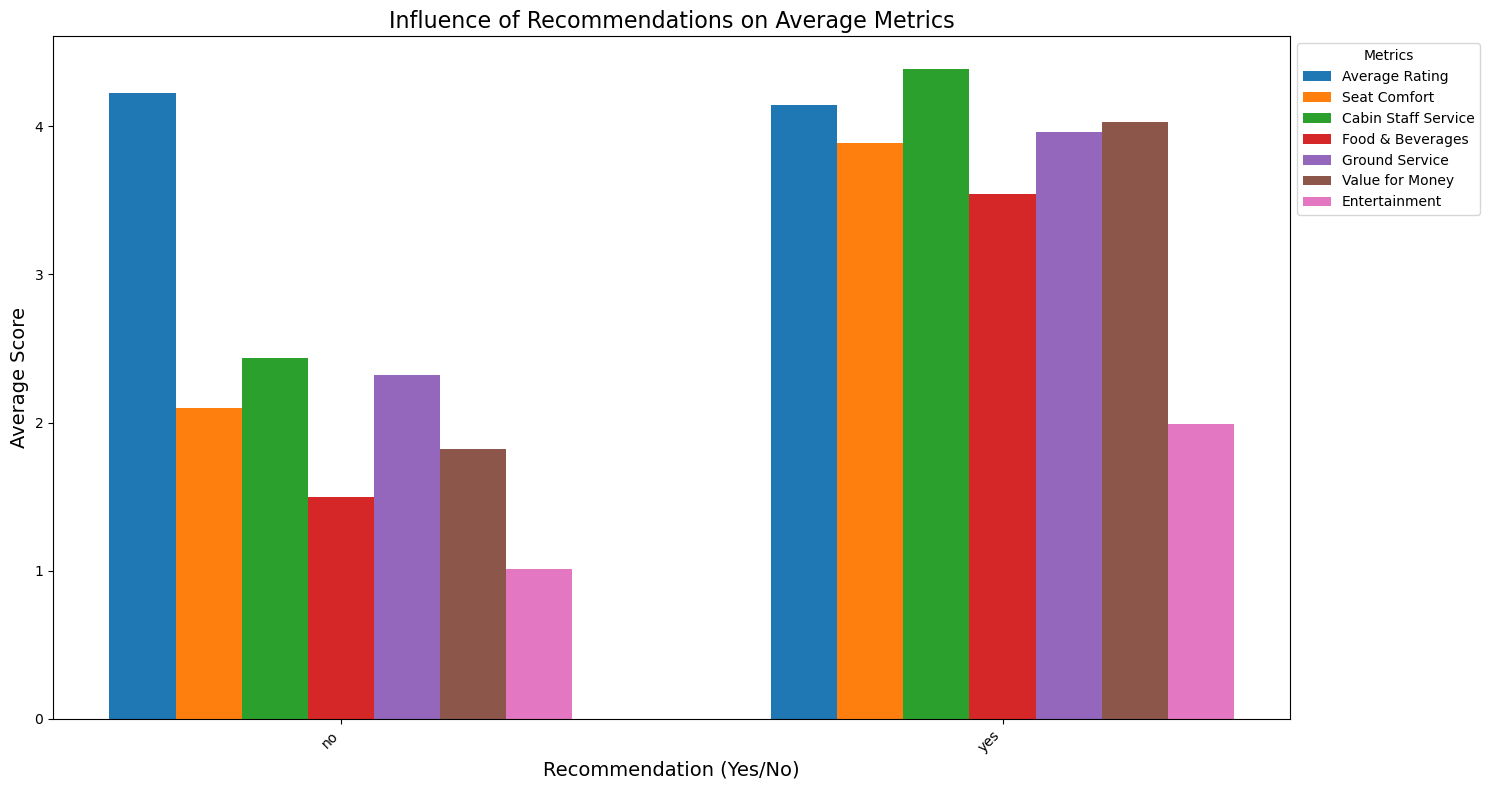

In [161]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics and their labels
metrics = [
    'avg_rating', 'avg_seat_comfort', 'avg_cabin_staff_service',
    'avg_food_beverages', 'avg_ground_service', 'avg_value_for_money', 'avg_entertainment'
]
titles = [
    'Average Rating', 'Seat Comfort', 'Cabin Staff Service',
    'Food & Beverages', 'Ground Service', 'Value for Money', 'Entertainment'
]

# Prepare data for grouped bar chart
recommendation = recommendation_influence['recommended']
x = np.arange(len(recommendation))  # X-axis positions for recommendations
width = 0.1  # Width of each bar

# Set up the figure
plt.figure(figsize=(15, 8))

# Plot each metric as a grouped bar
for i, metric in enumerate(metrics):
    plt.bar(x + i * width, recommendation_influence[metric], width, label=titles[i])

# Add labels, title, and legend
plt.xticks(x + width * (len(metrics) - 1) / 2, recommendation, rotation=45, ha='right', fontsize=10)
plt.title('Influence of Recommendations on Average Metrics', fontsize=16)
plt.xlabel('Recommendation (Yes/No)', fontsize=14)
plt.ylabel('Average Score', fontsize=14)
plt.legend(title='Metrics', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Show the chart
plt.show()


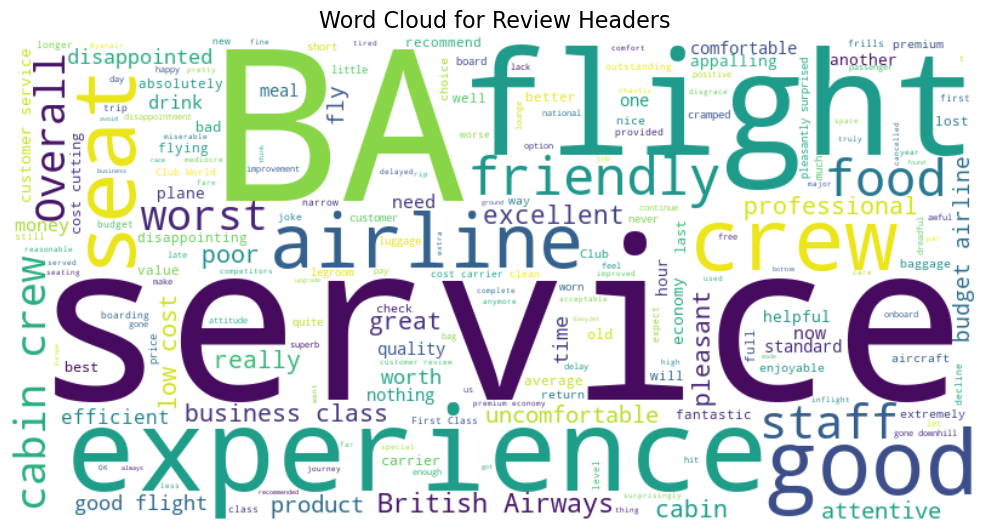

In [162]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all headers into a single string
header_text = ' '.join(merged_data['header'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(header_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Review Headers', fontsize=16)
plt.tight_layout()
plt.show()


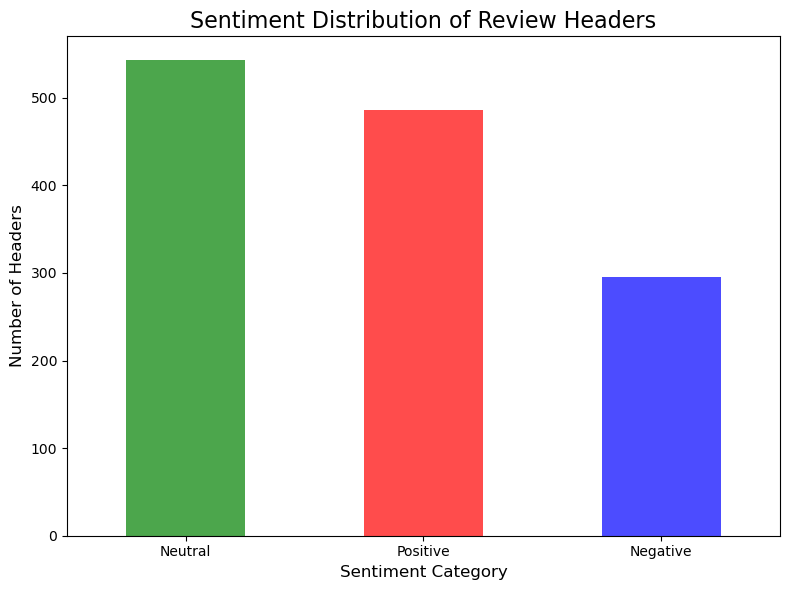

In [163]:
from textblob import TextBlob

# Perform sentiment analysis on the header column
merged_data['header_sentiment'] = merged_data['header'].dropna().apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiment as Positive, Negative, or Neutral based on polarity score
def classify_sentiment(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

merged_data['sentiment_category'] = merged_data['header_sentiment'].apply(classify_sentiment)

# Sentiment distribution
sentiment_distribution = merged_data['sentiment_category'].value_counts()


# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'blue'], alpha=0.7)
plt.title('Sentiment Distribution of Review Headers', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Number of Headers', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to C:\Users\BENSON
[nltk_data]     KAMAU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


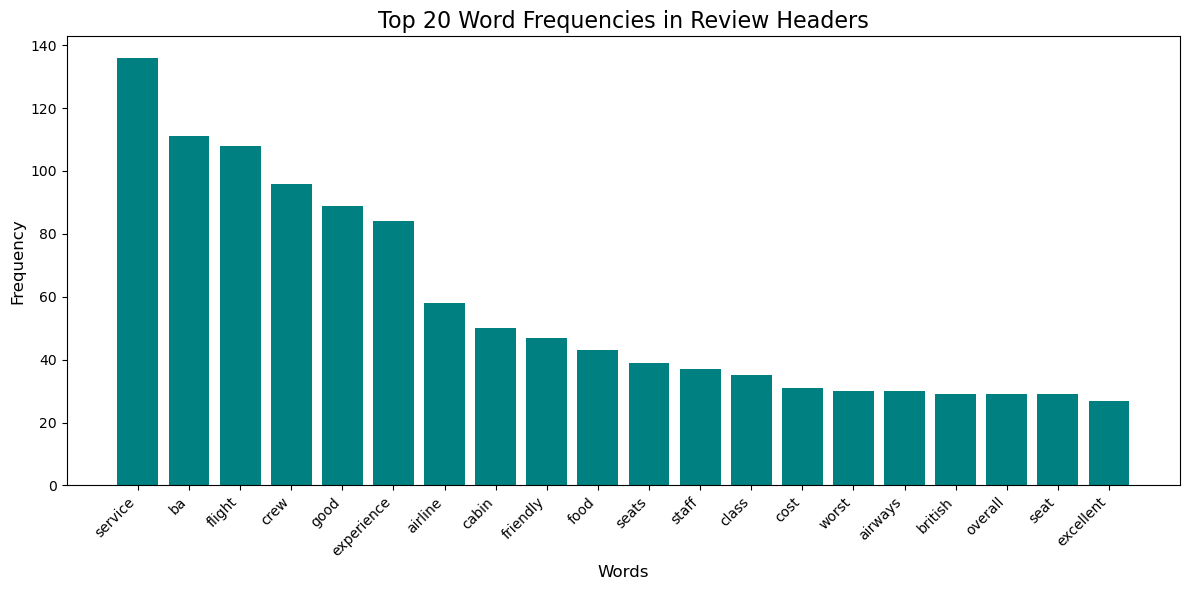

In [164]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Preprocess header text: Convert to lowercase, remove punctuation and stopwords
stop_words = set(stopwords.words('english'))
header_text_cleaned = ' '.join(merged_data['header'].dropna().str.lower())
header_text_cleaned = ''.join([char for char in header_text_cleaned if char not in string.punctuation])
words = header_text_cleaned.split()
filtered_words = [word for word in words if word not in stop_words]

# Count word frequencies
word_freq = Counter(filtered_words)

# Convert to DataFrame for better visualization
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False).reset_index(drop=True)



# Plot the top 20 most frequent words
plt.figure(figsize=(12, 6))
top_20_words = word_freq_df.head(20)
plt.bar(top_20_words['Word'], top_20_words['Frequency'], color='teal')
plt.title('Top 20 Word Frequencies in Review Headers', fontsize=16)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


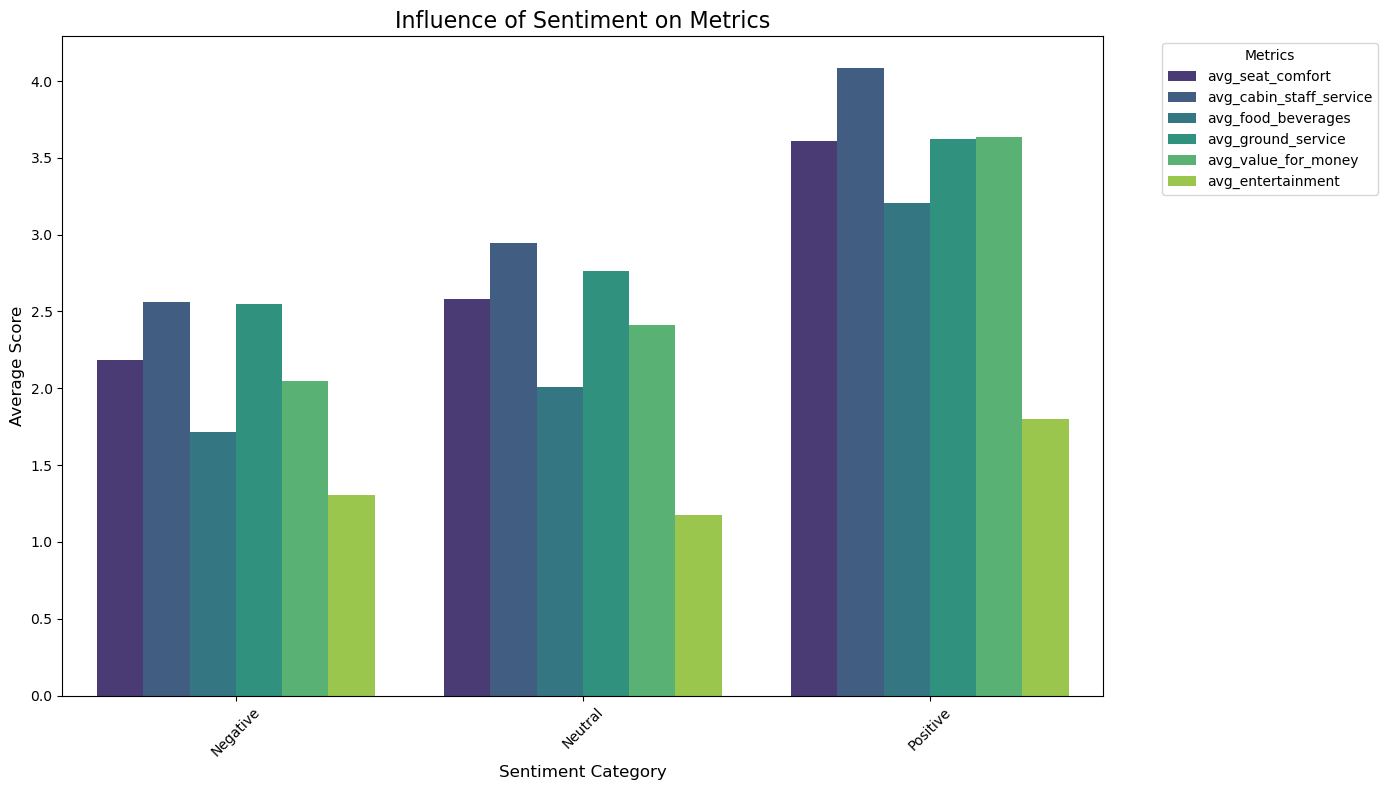

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by sentiment category and calculate average metrics
sentiment_influence = merged_data.groupby('sentiment_category').agg(
    avg_seat_comfort=('seat_comfort', 'mean'),
    avg_cabin_staff_service=('cabin_staff_service', 'mean'),
    avg_food_beverages=('food_beverages', 'mean'),
    avg_ground_service=('ground_service', 'mean'),
    avg_value_for_money=('value_for_money', 'mean'),
    avg_entertainment=('entertainment', 'mean')
).reset_index()

# Melt the data for easier visualization
melted_data = sentiment_influence.melt(id_vars='sentiment_category', 
                                       var_name='Metric', 
                                       value_name='Average Score')

# Create a visualization
plt.figure(figsize=(14, 8))
sns.barplot(data=melted_data, x='sentiment_category', y='Average Score', hue='Metric', palette='viridis')
plt.title('Influence of Sentiment on Metrics', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


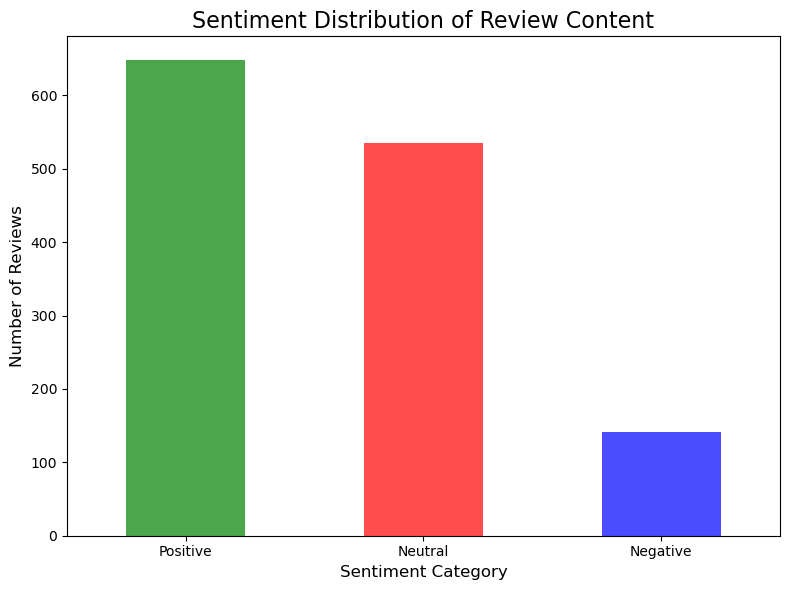

In [166]:
from textblob import TextBlob

# Perform sentiment analysis on the content column
merged_data['content_sentiment'] = merged_data['content'].dropna().apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiment as Positive, Negative, or Neutral based on polarity score
def classify_sentiment(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

merged_data['content_sentiment_category'] = merged_data['content_sentiment'].apply(classify_sentiment)

# Sentiment distribution
content_sentiment_distribution = merged_data['content_sentiment_category'].value_counts()


# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
content_sentiment_distribution.plot(kind='bar', color=['green', 'red', 'blue'], alpha=0.7)
plt.title('Sentiment Distribution of Review Content', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to C:\Users\BENSON
[nltk_data]     KAMAU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


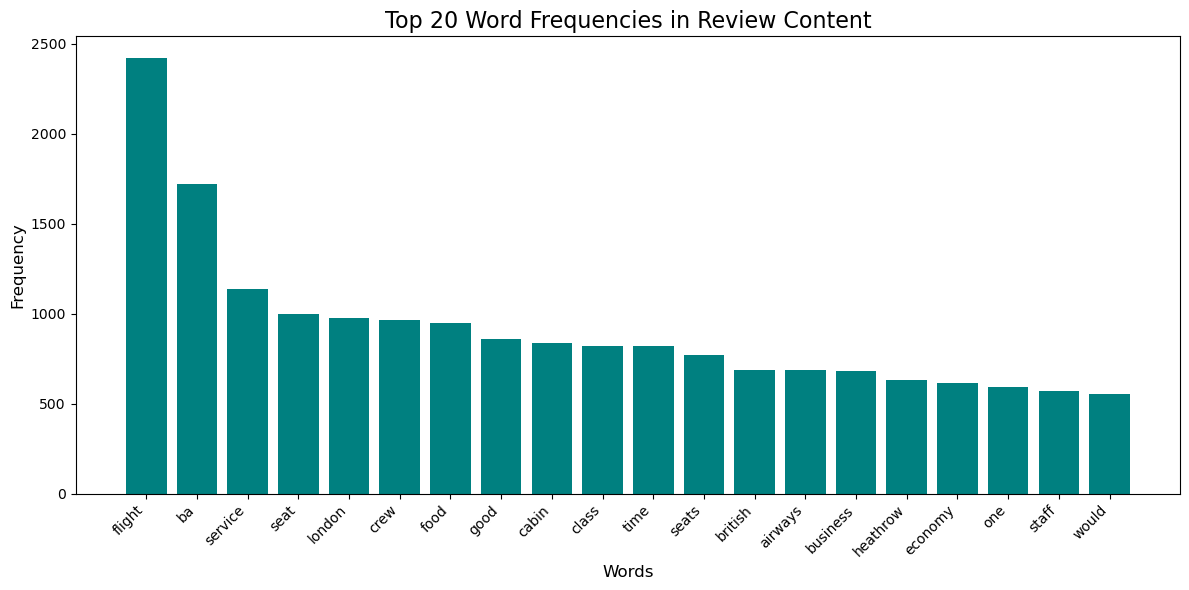

In [167]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Preprocess content text: Convert to lowercase, remove punctuation and stopwords
stop_words = set(stopwords.words('english'))
content_text_cleaned = ' '.join(merged_data['content'].dropna().str.lower())
content_text_cleaned = ''.join([char for char in content_text_cleaned if char not in string.punctuation])
content_words = content_text_cleaned.split()
filtered_content_words = [word for word in content_words if word not in stop_words]

# Count word frequencies
content_word_freq = Counter(filtered_content_words)

# Convert to DataFrame for better visualization
content_word_freq_df = pd.DataFrame(content_word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Plot the top 20 most frequent words in the content
plt.figure(figsize=(12, 6))
top_20_content_words = content_word_freq_df.head(20)
plt.bar(top_20_content_words['Word'], top_20_content_words['Frequency'], color='teal')
plt.title('Top 20 Word Frequencies in Review Content', fontsize=16)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


C:\Users\BENSON KAMAU\AppData\Local\Temp\ipykernel_21952\1258610955.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


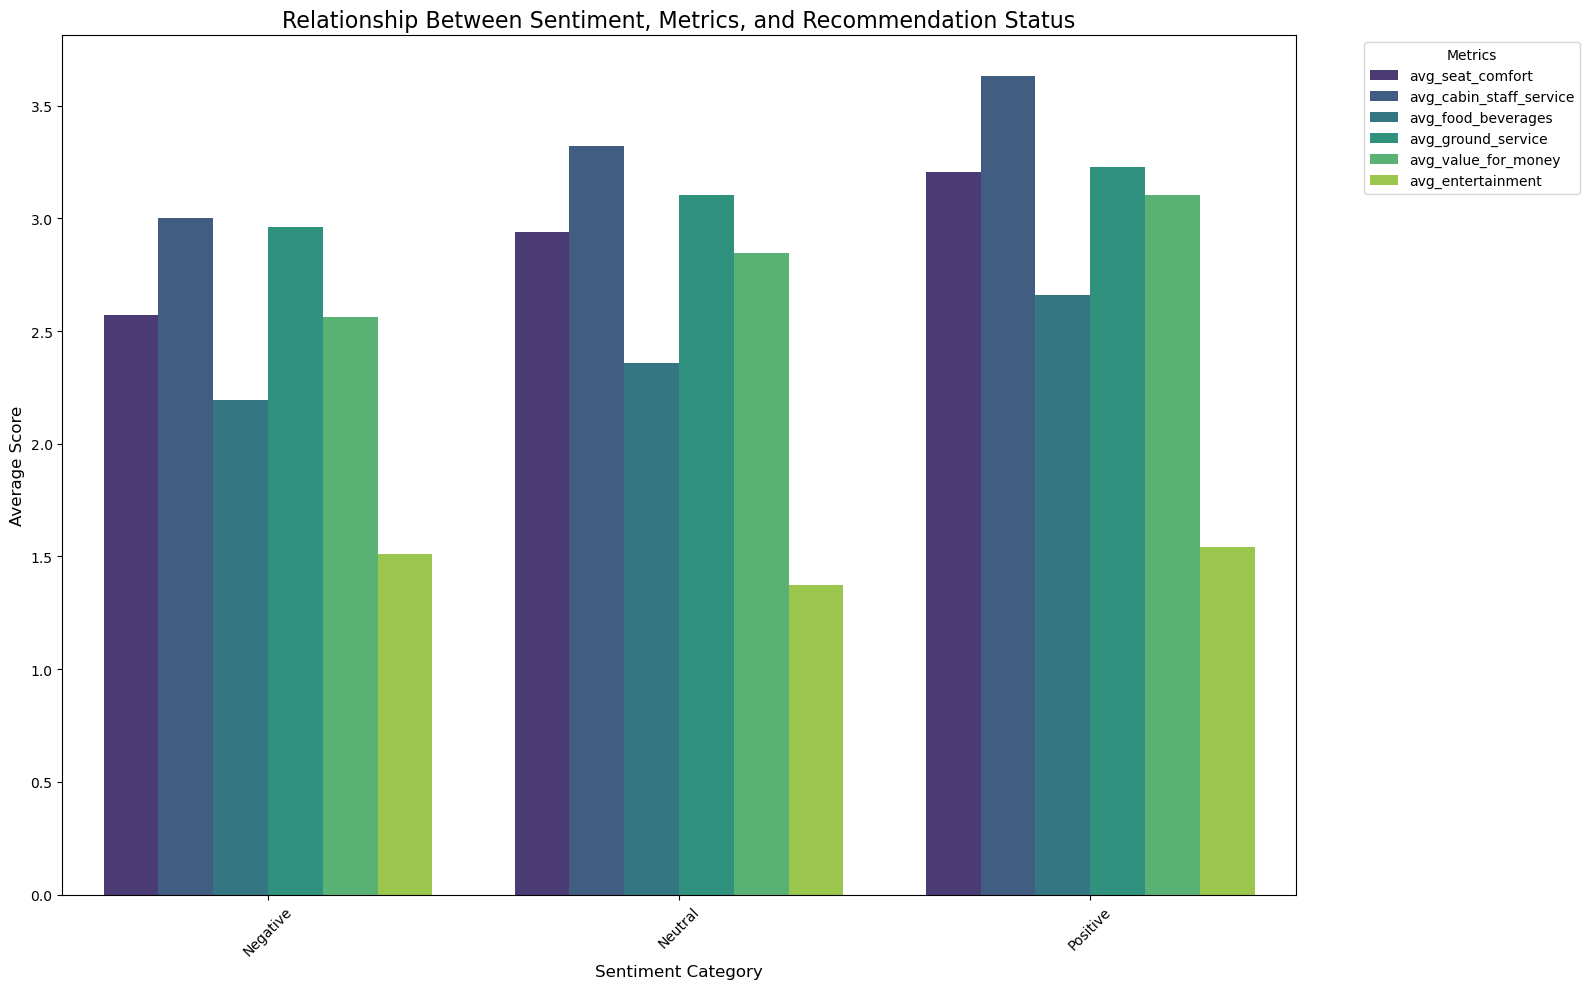

In [168]:
# Group data by sentiment category and recommendation status
sentiment_recommendation_analysis = merged_data.groupby(['sentiment_category', 'recommended']).agg(
    avg_seat_comfort=('seat_comfort', 'mean'),
    avg_cabin_staff_service=('cabin_staff_service', 'mean'),
    avg_food_beverages=('food_beverages', 'mean'),
    avg_ground_service=('ground_service', 'mean'),
    avg_value_for_money=('value_for_money', 'mean'),
    avg_entertainment=('entertainment', 'mean')
).reset_index()

# Melt the data for easier visualization
melted_sentiment_recommendation_data = sentiment_recommendation_analysis.melt(
    id_vars=['sentiment_category', 'recommended'],
    var_name='Metric',
    value_name='Average Score'
)

# Create a visualization
plt.figure(figsize=(16, 10))
sns.barplot(
    data=melted_sentiment_recommendation_data,
    x='sentiment_category',
    y='Average Score',
    hue='Metric',
    ci=None,
    palette='viridis'
)
plt.title('Relationship Between Sentiment, Metrics, and Recommendation Status', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

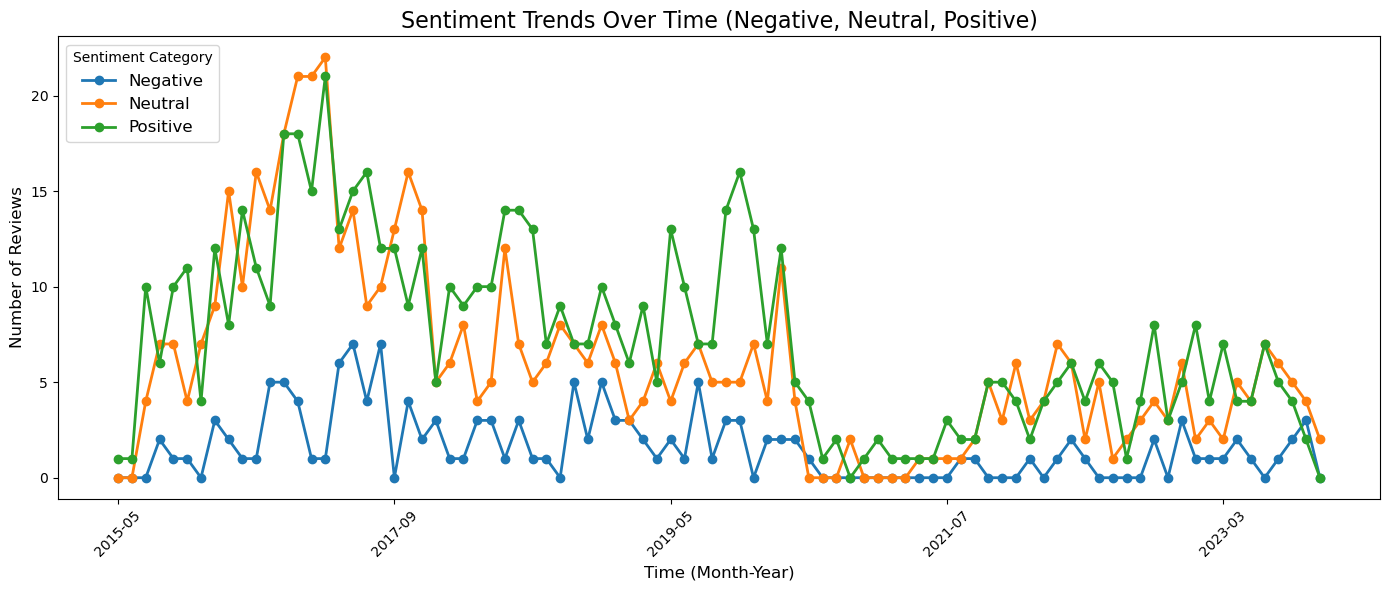

In [169]:
# Group by year, month, and sentiment category to count occurrences
sentiment_trends = merged_data.groupby(['Year', 'Month', 'content_sentiment_category']).size().reset_index(name='Count')

# Create a Month-Year column for visualization
sentiment_trends['Month-Year'] = sentiment_trends['Year'].astype(str) + '-' + sentiment_trends['Month'].astype(str).str.zfill(2)

# Pivot data for plotting
sentiment_trends_pivot = sentiment_trends.pivot(index='Month-Year', columns='content_sentiment_category', values='Count').fillna(0)
sentiment_trends_pivot = sentiment_trends_pivot.sort_index()

# Visualize sentiment trends over time
plt.figure(figsize=(14, 8))
sentiment_trends_pivot.plot(kind='line', figsize=(14, 6), marker='o', linewidth=2)
plt.title('Sentiment Trends Over Time (Negative, Neutral, Positive)', fontsize=16)
plt.xlabel('Time (Month-Year)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Sentiment Category', fontsize=12, loc='upper left')
plt.tight_layout()
plt.show()


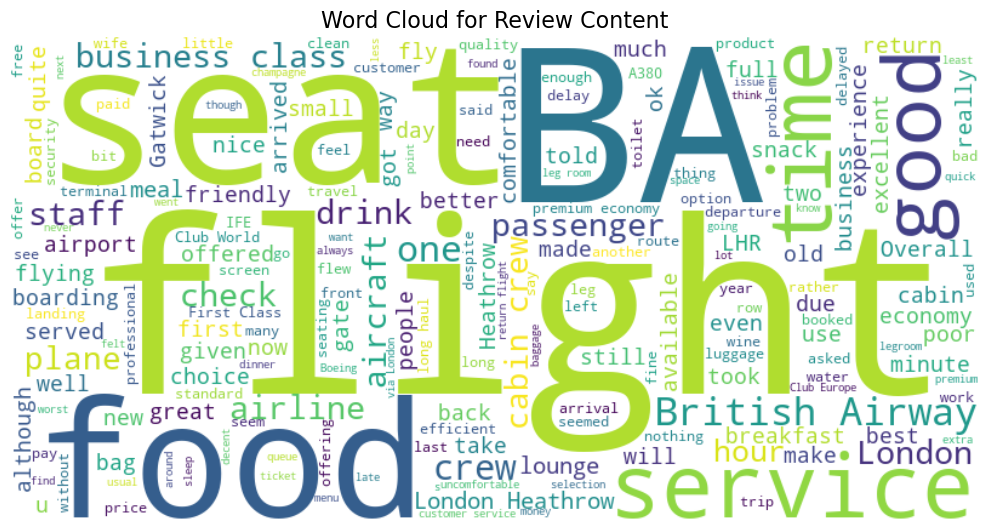

In [170]:
from wordcloud import WordCloud

# Combine all content into a single string
content_text = ' '.join(merged_data['content'].dropna().astype(str))

# Generate the word cloud
wordcloud_content = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate(content_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_content, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Review Content', fontsize=16)
plt.tight_layout()
plt.show()
